Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 380, 64)           192       
                                                                 
 batch_normalization (Batch  (None, 380, 64)           256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 380, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 380, 64)           12288     
                                                                 
 batch_normalization_1 (Bat  (None, 380, 64)           256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 380, 64)           0

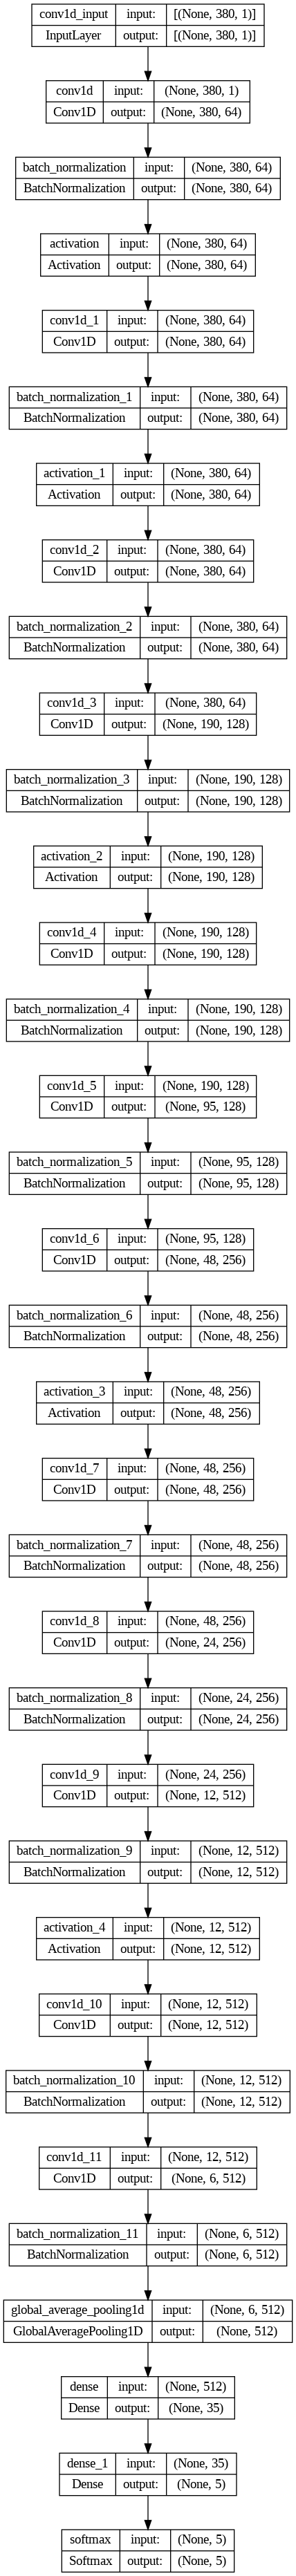

In [4]:
from tensorflow.keras.utils import plot_model
# ... (Đoạn code để xây dựng mô hình ResNet18 ở trên)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Flatten, Dropout, Softmax,BatchNormalization,Activation
from keras import regularizers

def ResidualBlock(model, inchannel, outchannel, stride=1):
    model.add(Conv1D(outchannel, kernel_size=3, strides=stride, padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv1D(outchannel, kernel_size=3, strides=1, padding='same', use_bias=False))
    model.add(BatchNormalization())

    if stride != 1 or inchannel != outchannel:
        model.add(Conv1D(outchannel, kernel_size=1, strides=stride, use_bias=False))
        model.add(BatchNormalization())

def ResNet18(input_shape=(380, 1), num_classes=5):
    model = Sequential()

    model.add(Conv1D(64, kernel_size=3, strides=1, padding='same', use_bias=False, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    ResidualBlock(model, inchannel=64, outchannel=64, stride=1)
    ResidualBlock(model, inchannel=64, outchannel=128, stride=2)
    ResidualBlock(model, inchannel=128, outchannel=256, stride=2)
    ResidualBlock(model, inchannel=256, outchannel=512, stride=2)

    # Replace the AveragePooling1D layers with GlobalAveragePooling1D
    model.add(GlobalAveragePooling1D())

    model.add(Dense(35, kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(num_classes, kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
    model.add(Softmax())

    return model

# Create ResNet18 model
model2 = ResNet18(input_shape=(380, 1))
model2.summary()

# Lưu biểu đồ của mô hình vào file 'ResNet18_Model.png'
plot_model(model2, to_file='ResNet18_Model.png', show_shapes=True, show_layer_names=True)


In [2]:
pip install keras
